## За пределами scipy, numpy, pandas, scikit-learn ещё что-то есть!

Код в этом ноутбуке не заработает из Anaconda по умолчанию.

# COMPUTATIONS

На питоне написано много библиотек, созданных специально для научных вычислений.
В том числе есть несколько "движков", осуществляющих символьные вычисления.

На слуху, конечно, **SymPy**
*SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.*

И в каком-то смысле "гибридные" -- **Theano** и **TensorFlow**.

В двух последних нужно на особом "языке" написать, что именно нужно вычислить, скомпилировать получившуюся конструкцию, а остальное возьмут на себя библиотеки.

У обеих есть свои недостатки и преимущества. Одна из причин их распространённости -- 
возможность "укладки" вычислений на GPU, что подчас ускоряет решение задачи в десятки раз.

И, конечно, на них пишут модные нейронные сети.

# MACHINE LEARNING 

### XGBoost или Как занять хорошее место на конкурсе, ничего не умея
https://github.com/dmlc/xgboost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

    pip install xgboost

Быстрый-быстрый бустинг деревьев.

*А ещё те же ребята сделали MXNet -- библиотека для распределённого глубокого обучения*
https://github.com/dmlc/mxnet

*Пока это не mainstream, но, говорят, выглядит многообещающе*

In [24]:
from sklearn.datasets import load_iris
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# ...где всё просто и знакомо
data = load_iris()

X = data.data
y = data.target

print(X.shape, y.shape)

kf = KFold(n_splits=3, shuffle=True) # не забывайте перемешивать

# API -- примерно то же
for train_index, test_index in kf.split(X):
    gbm = xgb.XGBClassifier(max_depth=4, n_estimators=300, nthread=3).fit(X[train_index], y[train_index])
    predictions = gbm.predict(X[test_index])
    print("Accuracy", accuracy_score(y[test_index], predictions))

# (estimators=30000  -- это шутка)
# Самостоятельная работа
# Возьмите нормальный большой датасет и примените к нему xgboost.
# Возьмите GradientBoosting из sklearn  с похожими параметрами.
# Сравните качество и быстродействие.

(150, 4) (150,)
Accuracy 0.92
Accuracy 0.96
Accuracy 0.98


## Нейронные сети
http://deeplearning.net/software_links/

Можно писать их на чистом питоне, можно -- на MXNet, tensorflow, Theano, ..., а можно 
воспользоваться ещё более высокоуровневыми средствами и строить нейронные сети из известных
блоков.

Примеры: **Lasagne, Keras**

https://lasagne.readthedocs.io/en/latest/
https://keras.io/

Keras работает как над Theano, так и над tensorflow (upd из 2017: а ещё над CNTK (от майкрософта) + есть форк keras, работающего над MXNet). Что-то одно должно быть обязательно установлено.

In [2]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from sklearn import datasets, metrics
import numpy as np

import warnings
warnings.filterwarnings('ignore')

digits = datasets.load_digits()
print(digits.data.shape, len(digits.target_names))

data = digits.data

# todo: do w/o loop
target = np.zeros((data.shape[0], len(digits.target_names)))

for index, d in enumerate(digits.target):
    target[index, d] = 1.0

def build_model():
    # точка входа в схему
    inputs = Input(shape=(data.shape[1],))

    # любой слой "вызывается" от тензора и возвращает тензор
    x = Dense(190, activation='relu')(inputs)
    x = Dropout(p=0.3)(x)
    x = Dense(300, activation='relu')(x)
    x = Dropout(p=0.5)(x)
    predictions = Dense(len(digits.target_names), activation='softmax')(x)

    # вход и три слоя, строим и компилируем модель
    model = Model(input=inputs, output=predictions)
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(data[:1000], target[:1000], verbose=0)  
    
    return model

acc_scores = []

for i in range(10):
    model = build_model()
    acc = metrics.accuracy_score(np.argmax(model.predict(data[1000:]), axis=1), digits.target[1000:])
    acc_scores.append(acc)
    # вот и обучили модель
    print(i + 1, "model trained, acc =", acc)

print("avg score", np.mean(acc_scores), " score std",  np.std(acc_scores))

(1797, 64) 10
1 Model trained, acc = 0.942283563363
2 Model trained, acc = 0.928481806775
3 Model trained, acc = 0.939774153074
4 Model trained, acc = 0.952321204517
5 Model trained, acc = 0.932245922208
6 Model trained, acc = 0.92973651192
7 Model trained, acc = 0.942283563363
8 Model trained, acc = 0.952321204517
9 Model trained, acc = 0.951066499373
10 Model trained, acc = 0.932245922208
avg score 0.940276035132  score std 0.00891105691572


У **Keras** замечательная документация 

https://keras.io/

и много хороших примеров, в том числе по мейнстримным моделям.

https://github.com/fchollet/keras/tree/master/examples

# IMAGE PROCESSING

## scikit-image
http://scikit-image.org/

    pip install scikit-image

Преобразование изображений
- фильтры, 
- сегментация,
- трансформация
- ...

Нужно сделать что-то простое -- это к skimage.

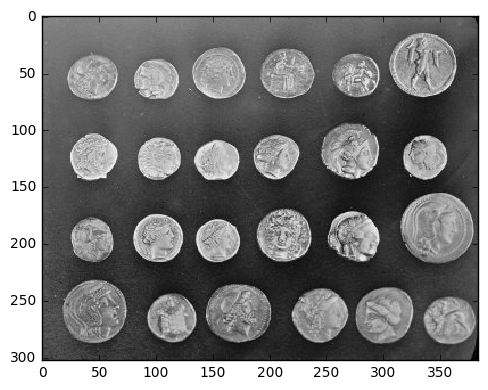

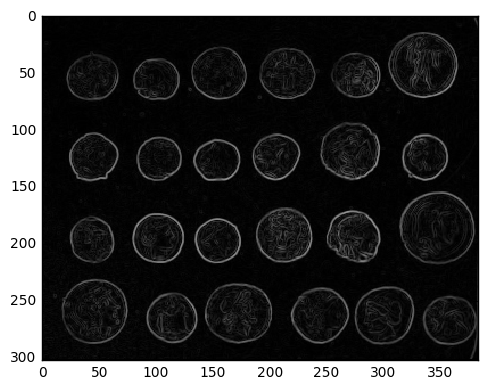

In [13]:
from skimage import data, io, filters
image = data.coins()
edges = filters.sobel(image)
io.imshow(image)
io.show()
io.imshow(edges)
io.show()

<class 'numpy.ndarray'>


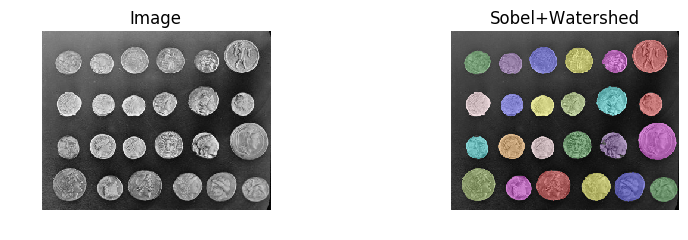

In [20]:
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.segmentation import slic, join_segmentations
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage import data, img_as_float

# переводим цвет в число с плавающей запятой
coins = img_as_float(data.coins())

print(type(coins))

# сегментация путём выделения границ и "заливки"
# Sobel:    https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F
edges = sobel(coins) 

markers = np.zeros_like(coins)
foreground, background = 1, 2

# отрезаем с помощью numpy-маски по порогам
markers[coins < 30.0 / 255] = background
markers[coins > 150.0 / 255] = foreground

# Watershed: https://en.wikipedia.org/wiki/Watershed_(image_processing)
ws = watershed(edges, markers)

# проставляем метки специальным методом из scipy
seg1 = ndi.label(ws == foreground)[0]

# # сегментация ещё одним методом, можно раскомментировать и посмотреть, что будет при пересечении двух разбиений
# seg2 = slic(coins, n_segments=117, max_iter=160, sigma=1, compactness=0.75,
#             multichannel=False)
# segj = join_segmentations(seg1, seg2)

# отрисовываем сегментацию
fig, axes = plt.subplots(ncols=2, figsize=(9, 2.5), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].set_title('Image')

color1 = label2rgb(seg1, image=coins, bg_label=0)
axes[1].imshow(color1, interpolation='nearest')
axes[1].set_title('Sobel+Watershed')

# color2 = label2rgb(seg2, image=coins, image_alpha=0.5)
# axes[2].imshow(color2, interpolation='nearest')
# axes[2].set_title('SLIC superpixels')
# color3 = label2rgb(segj, image=coins, image_alpha=0.5)
# axes[3].imshow(color3, interpolation='nearest')
# axes[3].set_title('Join')

for ax in axes:
    ax.axis('off')
fig.tight_layout()
plt.show()

## OpenCV
Как нетрудно догадаться, библиотека с методами компьютерного зрения для обработки видео и изображений. Есть порт под Python.

Задач решает много -- см. http://docs.opencv.org/3.0-beta/index.html
   
Говорят, установка отработает

     conda install -c conda-forge opencv

Попробуйте face detection, поставляемый OpenCV "из коробки".

# ГРАФЫ

Есть несколько библиотек, в которых реализованы разные алгоритмы на графах и которые имеют разные API.
Не самая плохая из них -- **networkx**.

- Python language data structures for graphs, digraphs, and multigraphs.
- Many standard graph algorithms
- Network structure and analysis measures
- Generators for classic graphs, random graphs, and synthetic networks
- Nodes can be "anything" (e.g. text, images, XML records)
- Edges can hold arbitrary data (e.g. weights, time-series)
- Open source BSD license
- Well tested: more than 1800 unit tests, >90% code coverage
- Additional benefits from Python: fast prototyping, easy to teach, multi-platform

Заслуживают внимания и **igraph**, **graph-tool**.

0 has PageRank 0.14272237980026567
1 has PageRank 0.26854250164735405
2 has PageRank 0.14272237980026567
4 has PageRank 0.21635020985013834
5 has PageRank 0.08629854782891022
6 has PageRank 0.14336398107306592


{0: <matplotlib.text.Text at 0x7efbce4140f0>,
 1: <matplotlib.text.Text at 0x7efbce417128>,
 2: <matplotlib.text.Text at 0x7efbce417630>,
 4: <matplotlib.text.Text at 0x7efbce417748>,
 5: <matplotlib.text.Text at 0x7efbce41be10>,
 6: <matplotlib.text.Text at 0x7efbce41b908>}

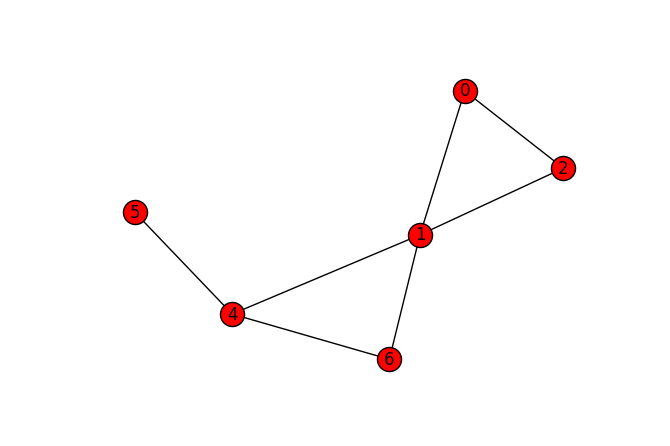

In [19]:
%matplotlib inline
import networkx as nx

edges = [(0, 1), (1, 2), (2, 0), (1, 4), (1, 6), (4, 6), (5, 4)]
graph = nx.Graph()

for fromm, too in edges:
    graph.add_edge(fromm, too)

pr_values = {}

for vertex, pr_value in nx.pagerank_scipy(graph).items():
    print(vertex, "has PageRank", pr_value)

layout = nx.spring_layout(graph)
nx.draw(graph, pos=layout)
nx.draw_networkx_labels(graph,pos=layout)

# ВИЗУАЛИЗАЦИЯ

Некоторые примеры с использованием matplotlib мы уже видели.

**Seaborn**

http://seaborn.pydata.org/index.html

Также настоятельно рекомендуют разобраться с **ggplot2**.

<class 'pandas.core.frame.DataFrame'>
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3


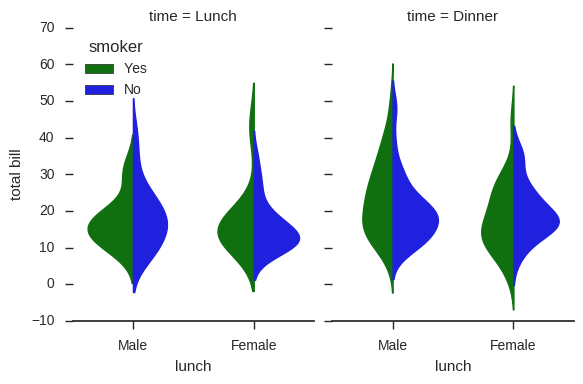

In [55]:
import seaborn as sns

tips = sns.load_dataset("tips")

print(type(tips))
print(tips.head(2))

sns.set(style="ticks", palette="colorblind")

g = sns.FacetGrid(tips, col="time", size=4, aspect=.75)

g = g.map(sns.violinplot, 
          "sex", "total_bill", "smoker", 
          palette={"No": "b", "Yes": "g"}, 
          inner=None, linewidth=1, 
          scale="area", split=True, width=0.75).despine(left=True)

g.fig.get_axes()[0].legend(title='smoker',loc='upper left')

g.set_axis_labels('lunch','total bill')

sns.plt.show()

# NATURAL LANGUAGE PROCESSING
В NLP много разных и сложных задач, поэтому general-purpose-библиотек немного. Как правило, библиотека посвящена той или иной задаче или группе методов.

Обычно упоминают **NLTK** (академическая, учебная разработка; его я использовал, например, для разбиения ваших текстов для домашних заданий на предложения).

Ещё хвалят за высокую скорость и ориентированность на "индустрию" библиотеку **spacy.io**.

In [42]:
import nltk

# некоторые ресурсы приходится дополнительно загружать
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sentence = """
"It seems very pretty," she said when she had finished it, 
"but it's rather hard to understand!" (She probably didn't 
want to confess, even to herself, that she didn't understand the poem.) 
"Somehow it seems to fill my head with ideas—only I don't exactly 
know what they are! However, somebody killed something: that's clear, at any rate."
"""

# делим на токены
tokens = nltk.word_tokenize(sentence)

# определяем части речи
tagged = nltk.pos_tag(tokens)

print("\n".join(map(lambda x: x[1] + "\t" + x[0], tagged)))

[nltk_data] Downloading package punkt to /home/aam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
''	''
PRP	It
VBZ	seems
RB	very
RB	pretty
,	,
''	''
PRP	she
VBD	said
WRB	when
PRP	she
VBD	had
VBN	finished
PRP	it
,	,
''	''
CC	but
PRP	it
VBZ	's
RB	rather
JJ	hard
TO	to
VB	understand
.	!
''	''
(	(
PRP	She
RB	probably
VBD	did
RB	n't
VB	want
TO	to
VB	confess
,	,
RB	even
TO	to
VB	herself
,	,
IN	that
PRP	she
VBD	did
RB	n't
VB	understand
DT	the
NN	poem
.	.
)	)
``	``
VBP	Somehow
PRP	it
VBZ	seems
TO	to
VB	fill
PRP$	my
NN	head
IN	with
JJ	ideas—only
PRP	I
VBP	do
RB	n't
RB	exactly
VB	know
WP	what
PRP	they
VBP	are
.	!
RB	However
,	,
NN	somebody
VBD	killed
NN	something
:	:
DT	that
VBZ	's
JJ	clear
,	,
IN	at
DT	any
NN	rate
.	.
''	''


In [56]:
# нужно выполнить python3 -m spacy.en.download all
# загрузка займёт какое-то время
from spacy.en import English

# dependency parser
nlp = English()
doc = nlp("It shouldn't come as much of a surprise that the imagery in Slaughterhouse-Five is topsy-turvy. " +
          "This entire book is an exercise in weird, genius repetition " +
          "and mixed-up reality: this entire book is a surprise. ")

for sent in doc.sents:
    print("\nSENTENCE", sent)
    print()
    for token in sent:
        if token.is_alpha:
            print(token.tag_, token.orth_, "->", token.head.lemma_)

from nltk import Tree

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_
    
for sent in doc.sents:
    print("TREE")
    [to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]


SENTENCE It shouldn't come as much of a surprise that the imagery in Slaughterhouse-Five is topsy-turvy.

PRP It -> come
MD should -> come
VB come -> come
RB as -> much
RB much -> come
IN of -> much
DT a -> surprise
NN surprise -> of
IN that -> be
DT the -> imagery
NN imagery -> be
IN in -> imagery
NNP Slaughterhouse -> five
NNP Five -> in
VBZ is -> much
JJ topsy -> turvy
NN turvy -> be

SENTENCE This entire book is an exercise in weird, genius repetition and mixed-up reality: this entire book is a surprise.

DT This -> book
JJ entire -> book
NN book -> be
VBZ is -> be
DT an -> exercise
NN exercise -> be
IN in -> exercise
JJ weird -> repetition
NN genius -> repetition
NN repetition -> in
CC and -> repetition
VBN mixed -> reality
RP up -> mix
NN reality -> repetition
DT this -> book
JJ entire -> book
NN book -> be
VBZ is -> be
DT a -> surprise
NN surprise -> be
TREE
                         come                                                    
  ________________________|___________ 

# TIME SERIES

Туториал: http://earthpy.org/pandas-basics.html

Есть statsmodels -- http://statsmodels.sourceforge.net/stable/tsa.html

Продвинутые методы есть в R, а к R можно обращаться с помощью http://rpy.sourceforge.net/

## Просто FYI: pandasql
Однако обратите внимание, что под ним SQLite. Это встроенная реляционная база данных, 
что накладывает определённые ограничения.Так,к примеру, код при необходимости н
е получится портировать под PySpark.

In [6]:
from pandasql import *
import pandas as pd

q  = """
SELECT
  m.date, m.beef, b.births
FROM
  meat m
LEFT JOIN
  births b
    ON m.date = b.date
WHERE
    m.date > '1974-12-31';
"""

meat = load_meat()
births = load_births()

print(meat.head(2))
print(births.head(2))

df = sqldf(q, globals())

# а ещё можно группировать, агрегировать и т. д.

        date   beef  veal    pork  lamb_and_mutton  broilers  other_chicken  \
0 1944-01-01  751.0  85.0  1280.0             89.0       NaN            NaN   
1 1944-02-01  713.0  77.0  1169.0             72.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
        date  births
0 1975-01-01  265775
1 1975-02-01  241045


### Стоит обратить внимание

* SKLEARN RELATED PROJECTS LIST: http://scikit-learn.org/stable/related_projects.html
* Deep learning frameworks list: http://deeplearning.net/software_links/

* HMMLearn https://github.com/hmmlearn/hmmlearn (Sergey is looking for maintainers of the project, BTW)
* Seqlearn https://github.com/larsmans/seqlearn
* auto-sklearn https://github.com/automl/auto-sklearn
* pySpark mllib (предварительно убедитесь, что у вас есть админы, бигдата и кластер с кучей памяти на каждой машине!)
* ...

Ресурсы

* https://nlpub.ru/
* http://www.kdnuggets.com/ (не пугайтесь, дизайн действительно страшный)
* ...

Code with pleasure.
Найдётся всё.
Don't be evil.
640 kilobytes ought to be enough for anybody.

(В общем, я так и не выбрал завершающую фразочку для последней лекции.)